### 1a)Importing libraries

In [54]:
#import pandas library
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns
#set figsize for all figures
sns.set_theme(rc={'figure.figsize':(12,8)})
import numpy as np
np.float = np.float64
np.bool = np.bool_
np.int = np.int64
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


### b)Read data from our csv file

In [55]:
#read data from csv file and create dataframe to be used
df =pd.read_csv('data/fraud_data.csv')

### c)Preview our dataset

In [56]:
### read first five and las five rows of our dataset
df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.76,-165.67,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.65,-164.72,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.76,-165.67,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.47,-165.47,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.76,-165.67,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.35,-165.91,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.76,-165.67,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.45,-166.08,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.76,-165.67,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.45,-165.45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.83,-118.50,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.44,-118.52,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.79,-124.14,260,"""Engineer, maintenance""",01-09-1956,080d620d24815c7d6c637cf0b71dde8e,42.90,-125.00,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.69,-104.44,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.54,-104.54,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.76,-165.67,145,"""Administrator, education""",09-11-1939,e66ffcc95ba7fc490486242af1205d04,64.08,-165.90,0


### Overview of the financial fraud dataset
The dataset consists of 14,446 rows and 15 columns, with the following structure:

### 1.Date and Time Features:
trans_date_trans_time: Timestamp of the transaction.
### 2.Transaction and Location Features:
merchant: The name of the merchant where the transaction occurred.
category: The category of the transaction, such as grocery_net, shopping_net, etc.
amt: The amount of money spent in the transaction.
city and state: The location where the transaction took place.
lat and long: Latitude and longitude of the transaction location.
merch_lat and merch_long: Latitude and longitude of the merchant’s location.
### 3.Demographic and Personal Features:
city_pop: The population of the city where the transaction took place.
job: The job title of the individual making the transaction.
dob: The date of birth of the individual, currently in object format.
trans_num: A unique identifier for the transaction.
### 4.Target Variable:
is_fraud: Indicates whether the transaction was fraudulent (1) or not (0).

### d)Check shape of our dataset

In [57]:
#check no of rows and columns in the dataset
df.shape #14446 rows and 15 columns

(14446, 15)

### e)Access information about our dataset

In [58]:
#getting to know about our dataset by accessing its infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

### f)get summary statistics about our data

In [59]:
pd.set_option('display.float_format','{:.2f}'.format)
#statisctics for int and float objects
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14446.00,14446.00,14446.00,14446.00,14446.00,14446.00
mean,124.43,39.79,-110.87,106537.00,39.79,-110.87
std,231.35,5.32,12.99,290291.61,5.36,13.00
min,1.00,20.03,-165.67,46.00,19.03,-166.67
25%,12.08,36.72,-120.42,493.00,36.79,-120.15
50%,51.52,39.67,-111.10,1645.00,39.62,-111.19
75%,101.03,41.94,-101.14,35439.00,42.28,-100.45
max,3261.47,66.69,-89.63,2383912.00,67.51,-88.65


In [60]:
### summary statisctics for str objects
df.describe(include='O')

,trans_date_trans_time,merchant,category,city,state,job,dob,trans_num,is_fraud
count,14446,14446,14446,14446,14446,14446,14446,14446,14446
unique,12126,693,14,176,13,163,187,14383,4
top,26-12-2020 23:29,Kilback LLC,grocery_pos,Phoenix,CA,"""Surveyor, minerals""",17-07-1989,a3806e984cec6ac0096d8184c64ad3a1,0
freq,5,58,1602,297,3375,262,197,2,12600


### 2.Cleaning our data
### a)convert trans_date_trans_time to datetime format

In [61]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='%d-%m-%Y %H:%M')
df['trans_date_trans_time']

0       2019-01-04 00:58:00
1       2019-01-04 15:06:00
2       2019-01-04 22:37:00
3       2019-01-04 23:06:00
4       2019-01-04 23:59:00
                ...        
14441   2019-01-22 00:37:00
14442   2019-01-22 00:41:00
14443   2019-01-22 00:42:00
14444   2019-01-22 00:48:00
14445   2019-01-22 00:55:00
Name: trans_date_trans_time, Length: 14446, dtype: datetime64[ns]

### b)Converting dob to datetime format and calculate the age of the individual at the time of the transaction.

In [62]:
df['dob'] = pd.to_datetime(df['dob'],format='%d-%m-%Y')
df['dob']

0       1939-11-09
1       1939-11-09
2       1939-11-09
3       1939-11-09
4       1939-11-09
           ...    
14441   1976-10-18
14442   1956-09-01
14443   1973-05-16
14444   1939-11-09
14445   1950-09-15
Name: dob, Length: 14446, dtype: datetime64[ns]

In [63]:
#get age
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year
df['age']

0        80
1        80
2        80
3        80
4        80
         ..
14441    43
14442    63
14443    46
14444    80
14445    69
Name: age, Length: 14446, dtype: int64

### c)Convert is_fraud from an object to an integer  for easier analysis 

In [64]:
df['is_fraud'] = df['is_fraud'].str[0].astype(int) #df['is_fraud'].str.extract('(\d)').astype(int)

### 3. EDA
### a)univariate analysis:
We'll start with univariate analysis to understand the distribution of key  features like amt,age and city_pop
The univariate analysos reveals the following insights:

### a)Transaction Amounts:

3.4910004115854094

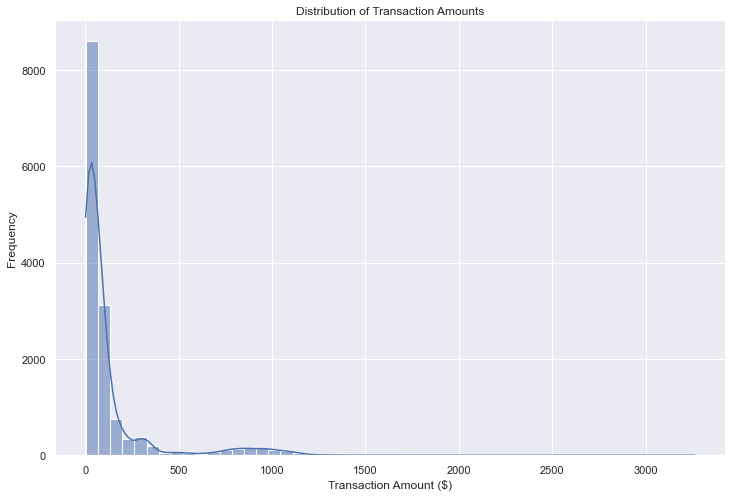

In [65]:
sns.histplot(df['amt'],bins=50,kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency');
df['amt'].skew()

The distribution of transcation amounts is right-skewed with most tranactions being relatively small. A few transcations have significantly higher amounts, indicating potential outliers

### b)Customer Age:

0.6431284694990649

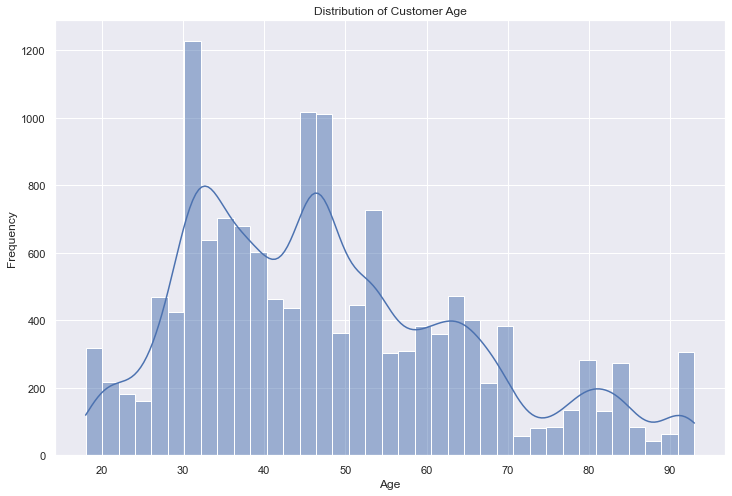

In [66]:
sns.histplot(df['age'],kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency');
df['age'].skew()

The age distribution shows a concentration of customers in the middle age range, with fewer younger and older customers.This distribution appears to be slightly left-skewed.

### c)City Population

3.6583766082892515

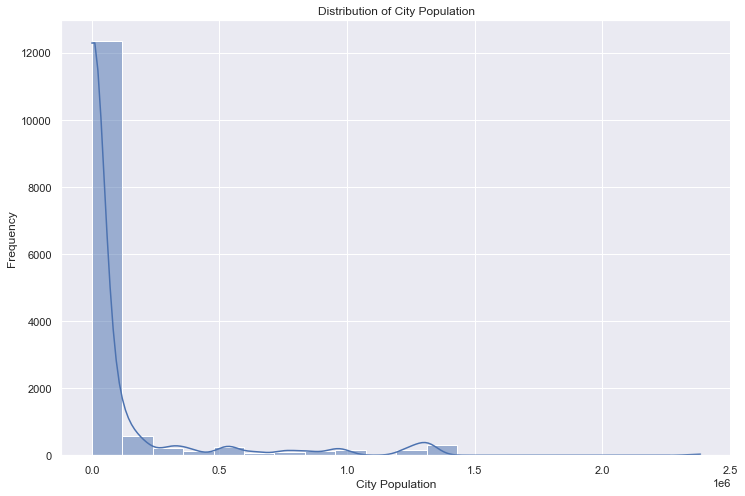

In [67]:
sns.histplot(df['city_pop'],bins=20,kde=True)
plt.title('Distribution of City Population')
plt.xlabel('City Population')
plt.ylabel('Frequency');
df['city_pop'].skew()

The city population distribution is heavily right-skewed, indicating that most transactions occur in smaller cities, with few taking place in larger cities.

### b)Bivariate Analysis:
We will perform a bivariate analysis to explore the relationships between key variables and the target variable(is_fraud)

This will examine how the transaction amount, customer age and city population relate to the fraudelent activity

the bivariate analysis provides the following insights:

### a)transcation Amount vs Fraud

<AxesSubplot:xlabel='amt', ylabel='Count'>

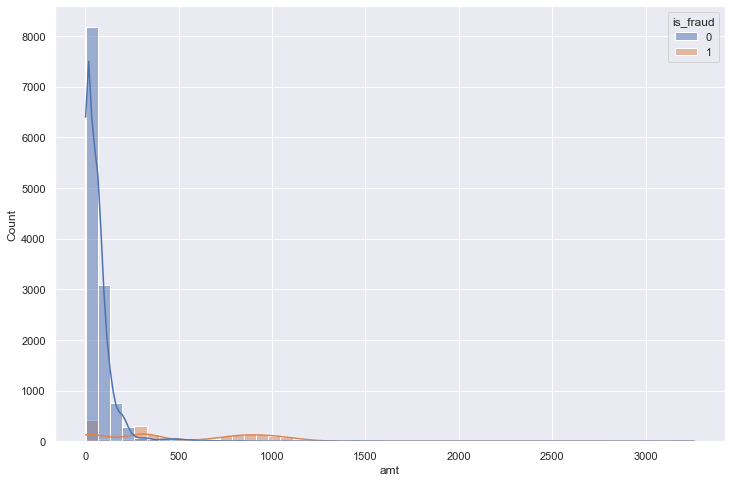

In [68]:
#hist
sns.histplot(data =df ,x='amt',bins=50,kde=True,hue='is_fraud')

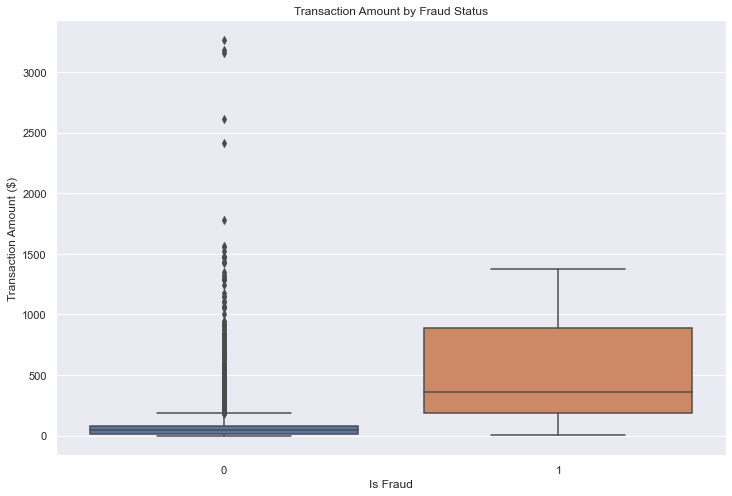

In [69]:
#boxplot
sns.boxplot(data=df, x='is_fraud',y='amt')
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount ($)');

Fraudelent transcations tend to have higher-amounts compared to non-fraudelent transactions.this suggests that high transaction amounts could be a potential indicator of fraud

### b)Customer age vs fraud

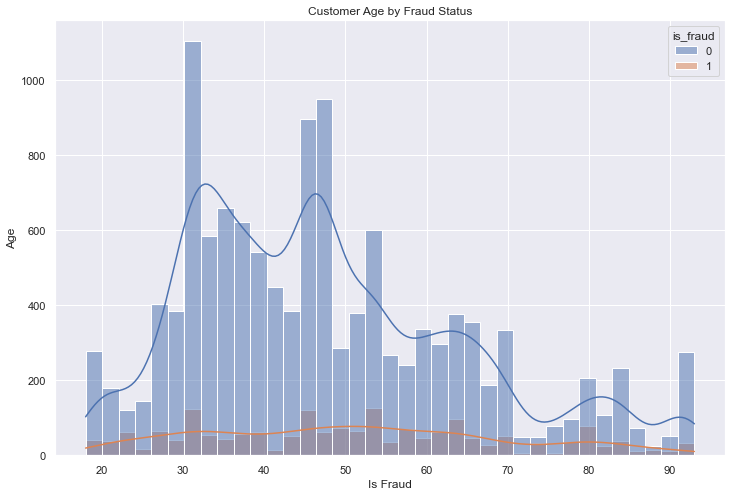

In [70]:
sns.histplot(data=df, x='age',hue='is_fraud',kde=True)
plt.title('Customer Age by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Age');

Text(0.5, 1.0, 'Customer Age by Fraud Status')

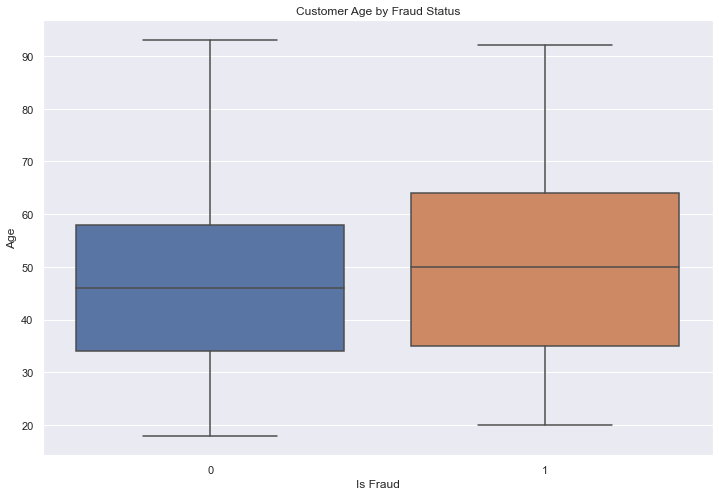

In [71]:
sns.boxplot(data=df,x='is_fraud',y='age')
plt.xlabel('Is Fraud')
plt.ylabel('Age')
plt.title('Customer Age by Fraud Status')

The age distribution for fraudlent transaction does not significantly differ fro non-fraudelent ones.This indicates that age might not be a strong predictor of fraud in this dataset

### c)city populations vs Fraud

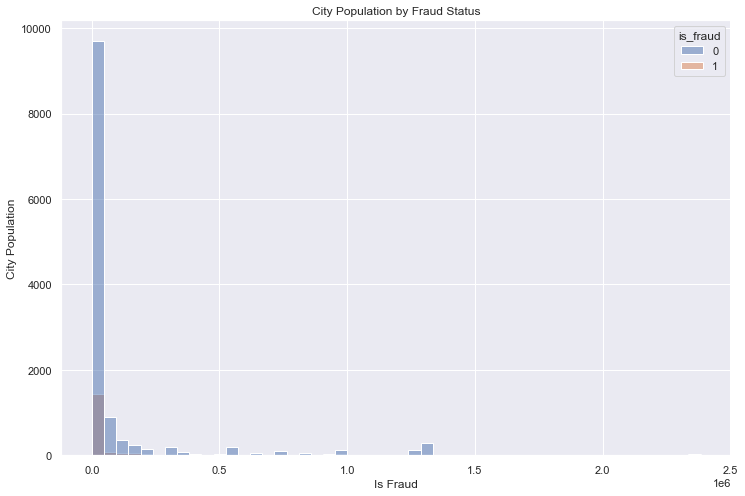

In [72]:
sns.histplot(data=df,bins=50 ,x='city_pop',hue='is_fraud')
plt.title('City Population by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('City Population');

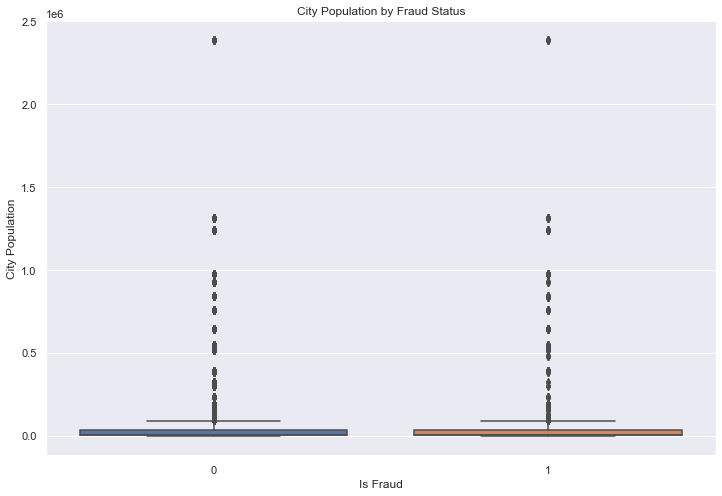

In [73]:
sns.boxplot(data=df,x='is_fraud',y='city_pop')
plt.title('City Population by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('City Population');

Fraudelent transcations are more likely to occur in cities with smaller populations. this could imply that fraudsters might be targeting less populated areas, possibly due to less stringet security measures

### d)Geospatial Analysis:
We will conduct a geospatial analysis to visualize the geographic distribution of tramscatiobs and identify any patterns related to fraud
### Geographic Distribution of Fraud:

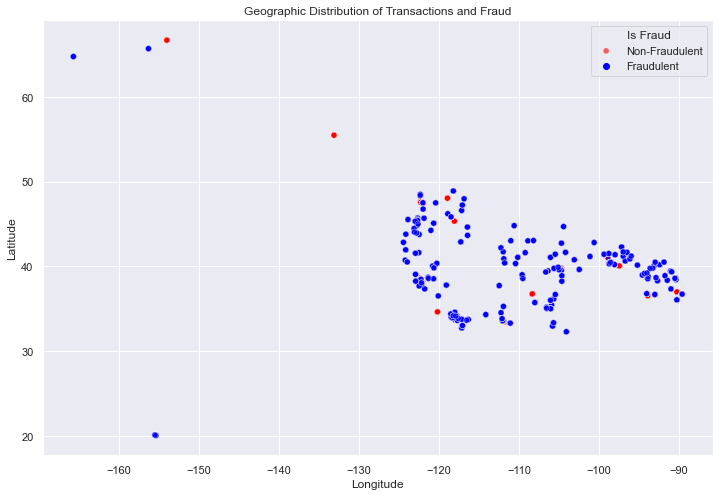

In [74]:
sns.scatterplot(data=df,x='long',y='lat',hue='is_fraud',palette={0:'blue',1:'red'},alpha=0.6)
plt.title('Geographic Distribution of Transactions and Fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Is Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

Fraudulent transactions (marked in red) are spread across various locations, but there seems to be a concentration in certain areas.

This suggests that fraud activity might be more prevalent in specific regions, which could be worth further investigation.
- Comparison with Non-Fraudulent Transactions:
Non-fraudulent transactions (marked in blue) are distributed more evenly across the map. The overlap between fraudulent and non-fraudulent transactions indicates that fraud does not exclusively occur in isolated areas but rather within regions of regular transaction activity.

### 4)Analysis of Fraudelent transactions using machine learning.
### a)Feature Engineering
First we will refine and create additional features that could improve the predictive power of our model.we'll then build and test a predictive model to identify fraudulent transcations.

We'll create the following additional features which are relevant to the analysis
- Transaction Frequency : The number of transcations made by a user in a give timeframe(e.g. daily, weekly)
- merchant consistency : the frequency of transactions at the same merchant by the same user
- distance anomalies : The relationsship between the distance of a transcation from the user's home location and whether it was fraudelent.
- Transaction Hour: The hour when the transaction occurred.
- Transaction Day of Week: The day of the week when the transaction occurred.
- Transaction Month: The month when the transaction occurred.


In [75]:
#Feature Engineering 
df['transaction_hour'] = df.trans_date_trans_time.dt.hour
df['transaction_day_of_week'] = df.trans_date_trans_time.dt.day_of_week
df['transaction_month'] = df.trans_date_trans_time.dt.month

def calculate_distance(row):
    trans_location = (row['lat'],row['long'])
    merch_location = (row['merch_lat'], row['merch_long'])
    return geodesic(trans_location,merch_location).kilometers

df['distance_to_merch'] = df.apply(calculate_distance,axis=1)
df['daily_transaction_count'] = df.groupby(df['trans_date_trans_time'].dt.date)['trans_num'].transform('count')
df['merchant_consistency'] = df.groupby(['job', 'merchant'])['trans_num'].transform('count')

### b)Predictive Modelling:
we'll use these features ,along with te original ones, to build a predictive model

- Split the data into training and testing sets
- Build a model(using Random Forest Classifier) to predict whther a trasaction is fraudelebt
- Evaluate the model using apprpriate metrics like accuracy, precision, recall and F1-score

In [76]:
# Model Building
features = ['amt','city_pop','distance_to_merch','daily_transaction_count', 'merchant_consistency','transaction_hour',
       'transaction_day_of_week', 'transaction_month']
X = df[features]
y= df['is_fraud']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
model =  RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
report =  classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
print(report)
print(conf_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3769
           1       1.00      0.99      0.99       565

    accuracy                           1.00      4334
   macro avg       1.00      0.99      1.00      4334
weighted avg       1.00      1.00      1.00      4334

[[3767    2]
 [   6  559]]


The Random Forest model has produced the following results:

### Precision:

- For non-fraudulent transactions (class 0): 100%
- For fraudulent transactions (class 1): 100%
### Recall:

- For non-fraudulent transactions: 100%
- For fraudulent transactions: 99%
### F1-Score:

- For non-fraudulent transactions: 100%
- For fraudulent transactions: 99%

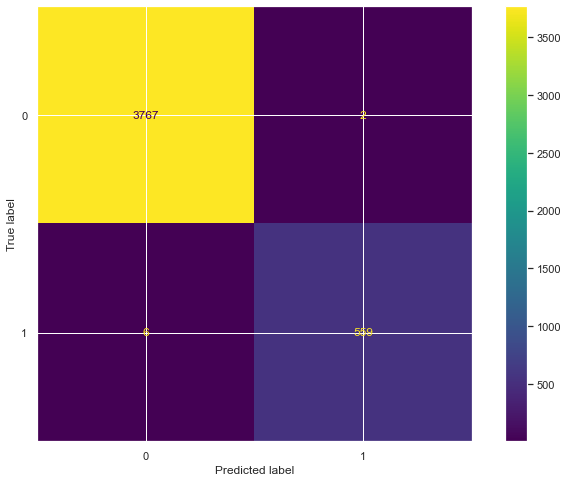

In [85]:
# plt.figure(figsize=(8, 6))
# ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Non-Fraudulent', 'Fraudulent'], cmap=plt.cm.Blues)
# plt.title('Confusion Matrix for Fraud Detection Model')
# plt.show()
#didnt  work so used th old method of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot();

- True positves(fraud detected correctly):559
- True Negatives (non-fraud detected correctly) 3767
- False positives(non-fraud detected as fraud):2
- False Negatives(Fraud not detected):6

### Report Interpretation:

- The model performs exceptionally well, with nearly perfect precision, recall, and F1-scores.
- There are very few misclassifications, with only 2 non-fraudulent transactions incorrectly classified as fraud and 6 fraudulent transactions missed.

### 5. Further Analysis:
### a)Financial Fraud by Category


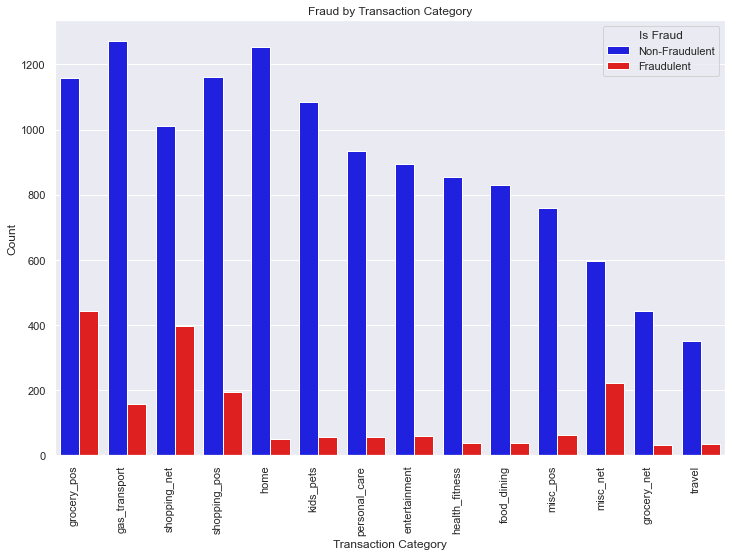

In [97]:
sns.countplot(data=df,x='category',hue='is_fraud',order=df['category'].value_counts().index,palette={0:'blue',1:'red'})
plt.title('Fraud by Transaction Category')
plt.xlabel('Transaction Category')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Is Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

The plot above reveals that certain transaction categories, such as shopping_net,grocery_pos exhibit a higher incidence of fraud compared to others

This suggests that these categories might be more attractive or vulnerable to fraudelent activities

### b)Analysis of Financial Fraud by Time.
Analysis fraud by time can provide insights into when fraudulent activies are most likely to occur.We can explore fraud patterns by:
Hour of the Day: Understanding at which times of day fraud is more frequent.
Day of the Week: Identifying whether certain days have higher fraud occurrences.
Month of the Year: Looking at seasonal patterns in fraud activities.

### 1.Fraud by Hour of the Day

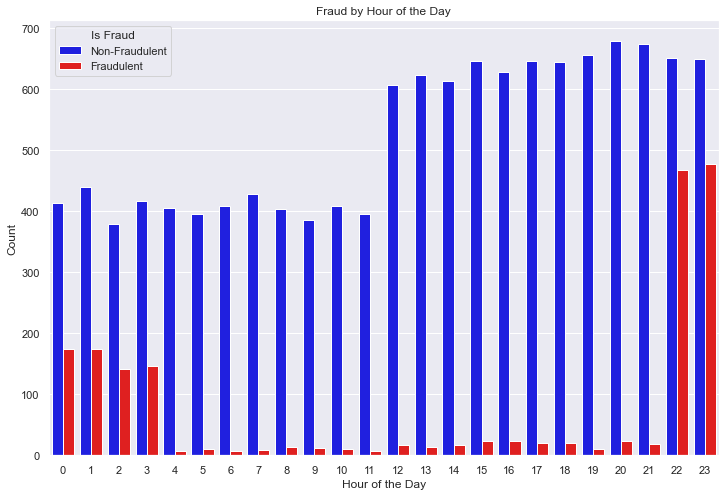

In [104]:
sns.countplot(data=df,x='transaction_hour',hue='is_fraud', palette={0: 'blue', 1: 'red'})
plt.title('Fraud by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Is Fraud', labels=['Non-Fraudulent', 'Fraudulent']);

Fraudulent transactions are more frequent during certain hours, particulalry late at night and early in the morning

### 2.Fraud by Day of the Week

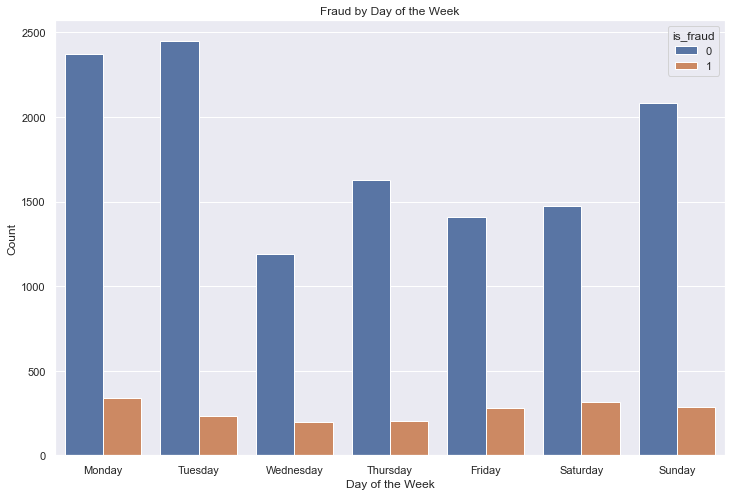

In [105]:
sns.countplot(data=df,x='transaction_day_of_week',hue='is_fraud')
plt.title('Fraud by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);

Fraud transcations appear to be fairly evenly distributed throughout the week, with a slight increase on the weekends

This could suggest that weekends might be a more opportunistic time for fraudsters, possibly due to reduced vigilance by financial institutions

### 3.Fraud by Month of the year

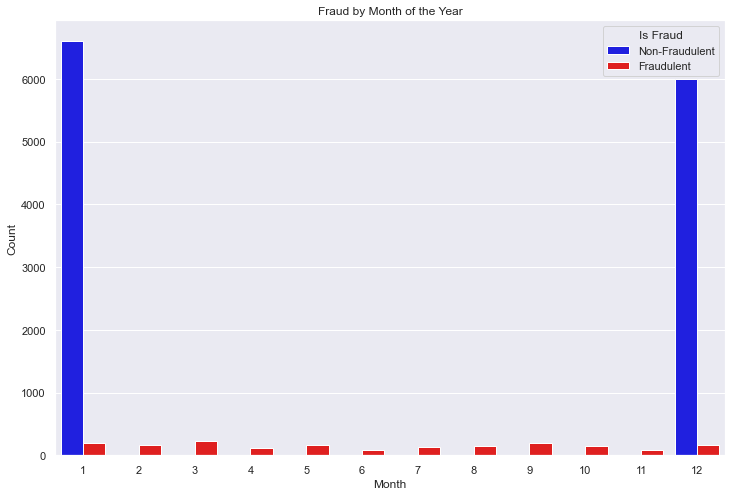

In [109]:
sns.countplot(data=df,x='transaction_month',hue='is_fraud',palette={0:'blue',1:'red'})
plt.title('Fraud by Month of the Year')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Is Fraud', labels=['Non-Fraudulent', 'Fraudulent']);

The distribution of fraid across the months does not show a very strong seasonal pattern, though there are slight variations

It might be interesting to investigate further if there any specific events or holidays that correlate with these variations

## Conclusion
Through this comprehensive analysis, we have identified several key patterns asssociated with fraudelent transactions including higher transcation categories, and certain geographic locations
